# Herkunftsländer der Arbeitnehmer

In [3]:
import cleanup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# cleanup.generate_cleaned_df()


In [5]:

col_list = ["us_economic_sector", "employer_name"]
visas_df = pd.read_csv('../data/us_perm_visas_cleaned.csv', usecols=col_list)

C:\Users\lassu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
visas_df.head ()

,us_economic_sector,employer_name
0,IT,NETSOFT USA INC.
1,Other Economic Sector,PINNACLE ENVIRONEMNTAL CORP
2,Aerospace,"SCHNABEL ENGINEERING, INC."
3,Other Economic Sector,EBENEZER MISSION CHURCH
4,Advanced Mfg,ALBANY INTERNATIONAL CORP.


[Text(0, 0.5, 'Number of Visa applications'), Text(0.5, 0, 'Employer name')]

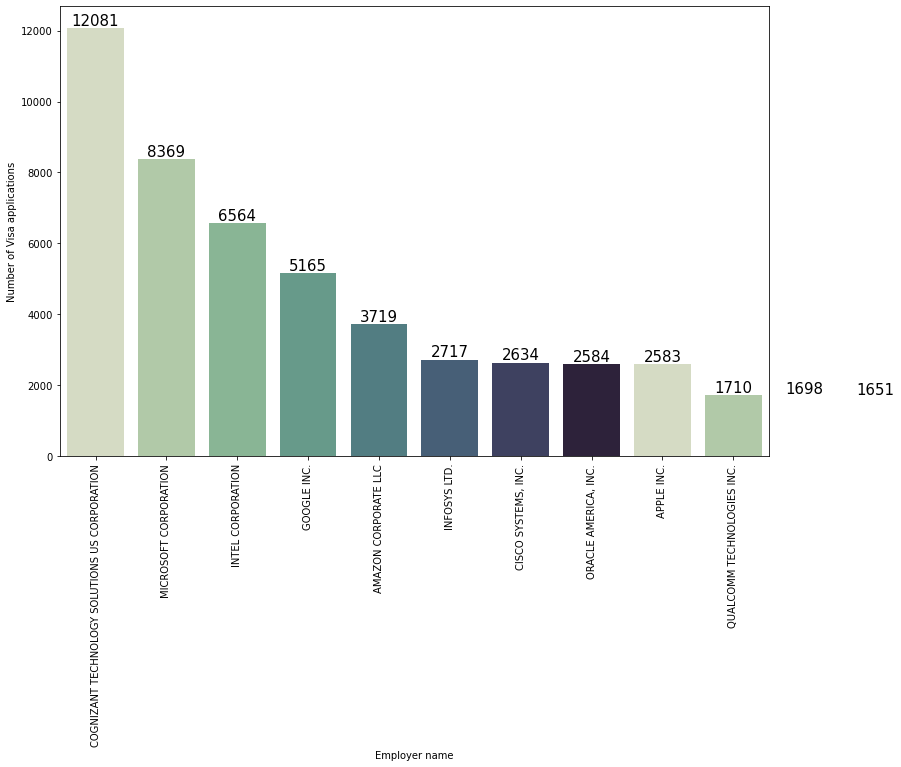

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.set_context(rc={"font.size":15,"axes.labelsize":20})
sns.countplot(x='employer_name', data=visas_df, palette = sns.cubehelix_palette(8, start=.5, rot=-.75), order=visas_df.employer_name.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

for i, v in visas_df.employer_name.value_counts().head(12).reset_index().iterrows():
    ax.text(i,v.employer_name,v.unique()[1], horizontalalignment='center',verticalalignment='bottom')

ax.set(xlabel='Employer name', ylabel='Number of Visa applications')

Sind das alles IT/Software Unternehmen? Welche Annahmen lassen sich daraus ableiten, bzw. welche Hypothesen? Hypothese 1: Die IT Branche ist die größte Branche in den USA --> kann das mit dem Datensatz überprüft werden, Hypothese 2: Die IT Branche hat die höchste Anzahl an Immigranten --> kann das mit dem Datensatz überprüft werden Hypothese 3: Die meisten Visa Bewerber fangen an in der IT Branche zu arbeiten. Dazu muss überprüft werden in welche Branche die Visa Bewerber anfangen zu arbeiten

In welcher Branche fangen die Visa Bewerber an zu arbeiten? Hierzu wird eine Liste mit den den einzelnen Branchen/Sektoren erstellt


([<matplotlib.patches.Wedge at 0xa03a2c8>,
 [Text(-0.7937354902089138, -0.7025553156747268, 'IT'),
  Text(0.8644718576476819, -0.5507389647874625, 'Other Economic Sector'),
  Text(1.0246138594173348, -0.02813252725784683, 'Aerospace'),
  Text(0.8504976023360418, 0.572082885970769, 'Advanced Mfg'),
  Text(0.2285531937784637, 0.9991938939033124, 'Educational Services'),
  Text(-0.14422290782434385, 1.0148028147668346, 'Retail'),
  Text(-0.3013947658762046, 0.9796867841827956, 'Construction'),
  Text(-0.3883912236415467, 0.9485658951270711, 'Hospitality'),
  Text(-0.4661703731534431, 0.91285824923368, 'Automotive'),
  Text(-0.6509703874116505, 0.7917465217562534, 'Health Care')],
 [Text(-0.7001346069295609, -0.6197068114678016, '45.3%'),
  Text(0.7590484603735744, -0.48357567639874766, '13.6%'),
  Text(0.8996609497322942, -0.024701731250792343, '3.6%'),
  Text(0.7467783825389637, 0.5023166803645777, '16.1%'),
  Text(0.20068085307377304, 0.8773409800126646, '7.9%'),
  Text(-0.1266347483335

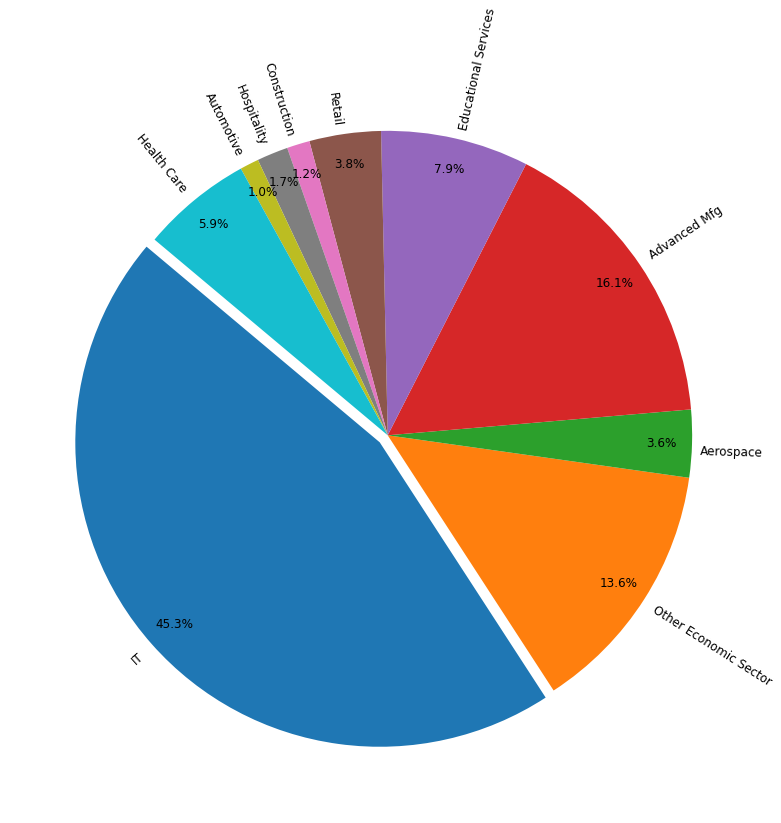

In [8]:

us_economic_counts = {}

for value in visas_df['us_economic_sector'].dropna():
    if value in us_economic_counts:
        us_economic_counts[value] += 1
    else:
        us_economic_counts[value] = 1

usecolabels = []
usecovalues = []
explode = (0.035, 0, 0, 0,0,0,0,0,0,0)

for key, value in us_economic_counts.items():
    usecolabels.append(key)
    usecovalues.append(value)


plt.figure(figsize=(14,14))
sns.set_context(rc={"font.size":12,"axes.labelsize":14,"xtick.labelsize" : 12})
plt.pie(usecovalues[:10], labels=usecolabels[:10], explode = explode, autopct='%1.1f%%', pctdistance = 0.9,
          rotatelabels = 90, startangle=140, labeldistance = 1.025)


Die meisten Bewerber arbeiten in der IT Branche